In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
train = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')

In [116]:
def find_x_y(data):
    Y = data[:,-1]
    X = np.delete(data,-1,axis=1)
    mean_vectors = []
    for cl in range(5):
        mean_vectors.append(np.mean(X[Y==cl],axis=0))
    return X,Y,mean_vectors

label_dict = {0:'T_shirts', 1:'Trouseres', 2:'Pullover', 3: 'Dress', 4:'Shirt'}

train_X, train_y, train_mean_vec = find_x_y(train)
test_X, test_y, test_mean_vec = find_x_y(test)



In [124]:
def find_S_W(X,Y,mean_vectors):
    S_W = np.zeros((784,784))
    for cl,mv in zip(range(5),mean_vectors):
        class_sc_mat = np.zeros((784,784))
        for row in X[Y==cl]:
            row,mv = row.reshape(784,1),mv.reshape(784,1)
            class_sc_mat+= (row-mv).dot((row-mv).T)
        S_W += class_sc_mat
    return S_W
    
train_SW = find_S_W(train_X,train_y, train_mean_vec)
test_SW = find_S_W(test_X, test_y, test_mean_vec)


In [59]:
def find_S_B(X,Y, mean_vectors):
    overall_mean = np.mean(X,axis= 0)
    S_B = np.zeros((784,784))
    for i,mean_vec in enumerate(mean_vectors):
        n=X[Y==i,:].shape[0]
        mean_vec=mean_vec.reshape(784,1)
        overall_mean = overall_mean.reshape(784,1)
        S_B+=n*(mean_vec-overall_mean).dot((mean_vec-overall_mean).T)
    return S_B

train_SB = find_S_B(train_X, train_y, train_mean_vec)
test_SB = find_S_B(test_X,test_y,test_mean_vec)

In [85]:
def find_eigen(S_W,S_B):
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
    eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse= True)
    eigenvalues_sum = sum(eigenvalues)
    for i, j in enumerate(eigen_pairs):
        print ("Eigenvalue {0:}: {1:.2%}". format(i,(j[0]/eigenvalues_sum).real))
    return eigen_pairs

train_pairs = find_eigen(train_SW, train_SB)
test_pairs = find_eigen(test_SW, test_SB)

Eigenvalue 0: 61.11%
Eigenvalue 1: 20.24%
Eigenvalue 2: 13.13%
Eigenvalue 3: 5.52%
Eigenvalue 4: 0.00%
Eigenvalue 5: 0.00%
Eigenvalue 6: 0.00%
Eigenvalue 7: 0.00%
Eigenvalue 8: 0.00%
Eigenvalue 9: 0.00%
Eigenvalue 10: 0.00%
Eigenvalue 11: 0.00%
Eigenvalue 12: 0.00%
Eigenvalue 13: 0.00%
Eigenvalue 14: 0.00%
Eigenvalue 15: 0.00%
Eigenvalue 16: 0.00%
Eigenvalue 17: 0.00%
Eigenvalue 18: 0.00%
Eigenvalue 19: 0.00%
Eigenvalue 20: 0.00%
Eigenvalue 21: 0.00%
Eigenvalue 22: 0.00%
Eigenvalue 23: 0.00%
Eigenvalue 24: 0.00%
Eigenvalue 25: 0.00%
Eigenvalue 26: 0.00%
Eigenvalue 27: 0.00%
Eigenvalue 28: 0.00%
Eigenvalue 29: 0.00%
Eigenvalue 30: 0.00%
Eigenvalue 31: 0.00%
Eigenvalue 32: 0.00%
Eigenvalue 33: 0.00%
Eigenvalue 34: 0.00%
Eigenvalue 35: 0.00%
Eigenvalue 36: 0.00%
Eigenvalue 37: 0.00%
Eigenvalue 38: 0.00%
Eigenvalue 39: 0.00%
Eigenvalue 40: 0.00%
Eigenvalue 41: 0.00%
Eigenvalue 42: 0.00%
Eigenvalue 43: 0.00%
Eigenvalue 44: 0.00%
Eigenvalue 45: 0.00%
Eigenvalue 46: 0.00%
Eigenvalue 47: 0.00%

LinAlgError: Singular matrix

In [61]:
W_train = np.hstack((train_pairs[0][1].reshape(784,1),train_pairs[1][1].reshape(784,1),train_pairs[2][1].reshape(784,1),train_pairs[3][1].reshape(784,1)))


In [98]:
X_train_lda = train_X.dot(W_train)


In [99]:
X_train_lda

array([[-3.07188115+0.j,  0.32390806+0.j, -2.3229647 +0.j,
         4.66593953+0.j],
       [10.14335255+0.j, -2.11529738+0.j, -0.34439288+0.j,
        -0.22703794+0.j],
       [-2.01779564+0.j,  0.22122295+0.j, -5.17755207+0.j,
         7.94497737+0.j],
       ...,
       [ 0.91947694+0.j,  4.78790747+0.j,  2.32795235+0.j,
         1.25358388+0.j],
       [-1.13875185+0.j,  0.83198739+0.j, -2.27899417+0.j,
         4.77393302+0.j],
       [11.97170698+0.j, -1.62074241+0.j, -1.93231898+0.j,
         1.59112492+0.j]])

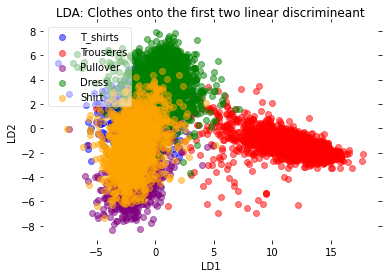

In [100]:
def plot_step_lda(X_lda,Y):
    ax=plt.subplot(111)
    for label, color in zip(range(5),("blue","red","purple","green","orange")):
        plt.scatter(x=X_lda[:,0].real[Y==label],
        y = (X_lda[:,1].real[Y==label]), color = color , alpha=0.5, label = label_dict[label])

    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend(loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA: Clothes onto the first two linear discrimineant")

    plt.tick_params(axis= 'both', which = 'both', bottom = 'off', top = 'off', labelbottom = 'on', left = 'off', right ='off', labelleft= 'on')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

plot_step_lda(X_train_lda,train_y)

In [110]:
X_1=X_train_lda[:,0].real
X_2=X_train_lda[:,3].real
X_train_lda.real

array([[-3.07188115,  0.32390806, -2.3229647 ,  4.66593953],
       [10.14335255, -2.11529738, -0.34439288, -0.22703794],
       [-2.01779564,  0.22122295, -5.17755207,  7.94497737],
       ...,
       [ 0.91947694,  4.78790747,  2.32795235,  1.25358388],
       [-1.13875185,  0.83198739, -2.27899417,  4.77393302],
       [11.97170698, -1.62074241, -1.93231898,  1.59112492]])

<AxesSubplot:ylabel='Count'>

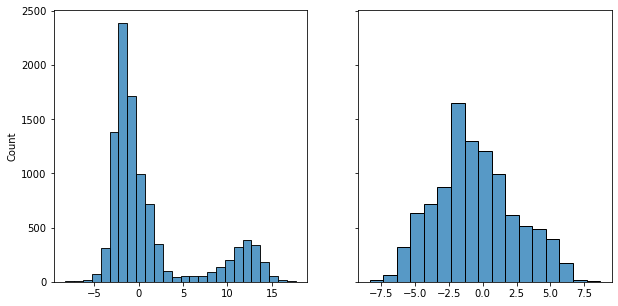

In [102]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)


sns.histplot(x=X_1, binwidth=1, ax = axs[0])
sns.histplot(x=X_2, binwidth= 1, ax=axs[1])

<AxesSubplot:ylabel='Density'>

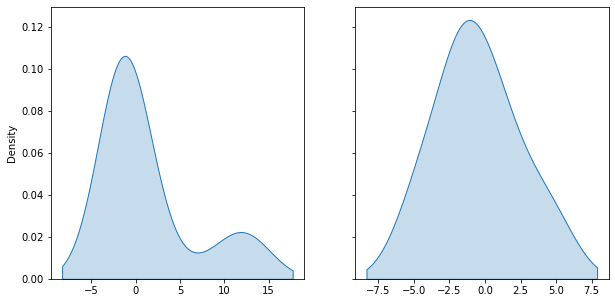

In [31]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)

sns.kdeplot(x=X_1, ax=axs[0], fill = True, bw_method= 1/2, cut = 0)

sns.kdeplot(x=X_2, ax=axs[1], fill = True, bw_method= 1/2, cut = 0)

In [125]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}  # P(class)
        self.feature_probs = {}  # P(feature | class)

    def fit(self, X, y):
        # Calculate P(class)
        classes, counts = np.unique(y, return_counts=True)
        total_samples = len(y)
        for c, count in zip(classes, counts):
            self.class_probs[c] = count / total_samples

        # Calculate P(feature | class)
        for c in classes:
            class_mask = (y == c)
            class_samples = X[class_mask]
            for feature in range(X.shape[1]):
                feature_values, feature_counts = np.unique(class_samples[:, feature], return_counts=True)
                feature_probs_given_class = dict(zip(feature_values, feature_counts / len(class_samples)))
                if feature not in self.feature_probs:
                    self.feature_probs[feature] = {}
                self.feature_probs[feature][c] = feature_probs_given_class

    def predict(self, X):
        predictions = []
        for sample in X:
            max_prob = -1
            predicted_class = None
            for c, class_prob in self.class_probs.items():
                feature_probs = 1
                for feature, value in enumerate(sample):
                    if value in self.feature_probs[feature][c]:
                        feature_probs *= self.feature_probs[feature][c][value]
                    else:
                        # If a feature value is not present in training data, assume a small probability
                        feature_probs *= 1e-10
                prob = class_prob * feature_probs
                if prob > max_prob:
                    max_prob = prob
                    predicted_class = c
            predictions.append(predicted_class)
        return predictions


